In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from data import oslo_data

In [26]:
print(oslo_data.describe())

       consumption  temperature         hour  day_of_week        month  \
count  8641.000000  8641.000000  8641.000000  8641.000000  8641.000000   
mean      6.876428     7.392883    11.501099     3.015970     6.560815   
std       4.672634     8.770901     6.922941     2.000804     3.458857   
min       1.520560   -15.400000     0.000000     0.000000     1.000000   
25%       2.610569     0.900000     6.000000     1.000000     4.000000   
50%       4.871180     7.900000    12.000000     3.000000     7.000000   
75%      11.458471    14.200000    18.000000     5.000000    10.000000   
max      18.045011    29.799999    23.000000     6.000000    12.000000   

             lag_1       lag_24      lag_168  
count  8640.000000  8617.000000  8473.000000  
mean      6.875819     6.864139     6.787192  
std       4.672562     4.673111     4.673034  
min       1.520560     1.520560     1.520560  
25%       2.610537     2.609611     2.593476  
50%       4.871048     4.827013     4.580735  
75% 

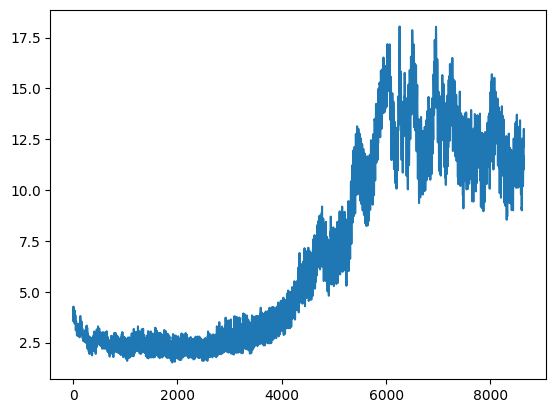

In [ ]:
plt.plot(np.linspace(0,len(oslo_data['hour']),len(oslo_data['consumption'])), oslo_data['consumption'])

In [41]:
# 1. Preprocess the Data
forecasted_data_oslo = pd.DataFrame()
#oslo_data.set_index('time', inplace=True)

# 2. Calculate Lag Features
for lag in [1, 24, 168]:
    oslo_data[f'lag_{lag}'] = oslo_data['consumption'].shift(lag)

# 3. Create Training and Testing Datasets
historical_data_oslo = oslo_data[oslo_data.index <= '2023-04-02 00:00:00']
forecast_data_oslo = oslo_data[oslo_data.index >= '2023-04-02 00:00:00']

# 4. Build a Time Series Forecasting Model
model = SARIMAX(historical_data_oslo['consumption'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit()

# 5. Forecast Consumption Values
for i in range(24):
    forecast_hour_oslo = pd.Timestamp('2023-04-02 00:00:00') + pd.DateOffset(hours=i)
    forecasted_value_oslo = results.predict(start=forecast_hour_oslo, end=forecast_hour_oslo).values[0]
    forecasted_row = pd.DataFrame({'time': [forecast_hour_oslo], 'forecasted_consumption': [forecasted_value_oslo]})

    forecasted_data_oslo = pd.concat([forecasted_data_oslo, forecasted_row], ignore_index=True)

/var/folders/lq/cq047j2d58s58sf6rf4hvnl40000gn/T/ipykernel_37215/2937797898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oslo_data[f'lag_{lag}'] = oslo_data['consumption'].shift(lag)
/Users/ThomasMelkeraaen/Desktop/ADS_github/TDT4259---Anvendt-data-science/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/ThomasMelkeraaen/Desktop/ADS_github/TDT4259---Anvendt-data-science/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
 This problem is unconstra

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.87125D-01    |proj g|=  6.34556D-01

At iterate    5    f= -4.14835D-01    |proj g|=  4.79118D-01

At iterate   10    f= -4.86688D-01    |proj g|=  7.75858D-01

At iterate   15    f= -4.98179D-01    |proj g|=  7.56240D-02

At iterate   20    f= -4.98914D-01    |proj g|=  9.29007D-04

At iterate   25    f= -4.98916D-01    |proj g|=  8.87403D-03

At iterate   30    f= -4.98918D-01    |proj g|=  2.24062D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [45]:
'''# Set the timezone for forecasted_data to match your data's timezone
forecasted_data_oslo['time'] = forecasted_data_oslo['time'].dt.tz_localize('UTC')'''

'''# Filter actual data for the 2th of December 2022
actual_consumption_oslo = oslo_data['2022-12-02':'2022-12-03']'''

# Filter actual data for the 2th of april 2023
actual_consumption_oslo_2 = oslo_data['2023-04-01':'2023-04-02']

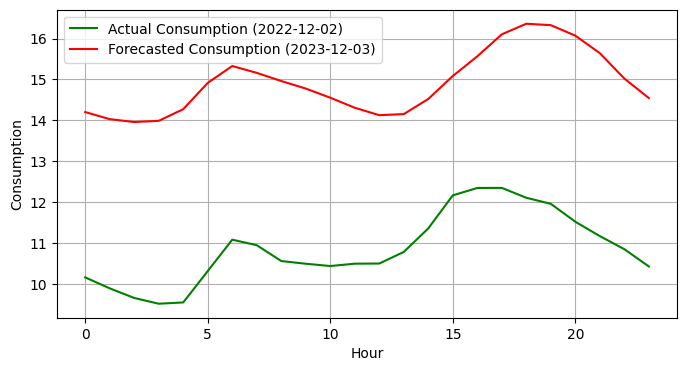

In [ ]:
# Plot Actual and Forecasted Consumption
plt.figure(figsize=(8, 4))
plt.plot(actual_consumption_oslo['hour'], actual_consumption_oslo['consumption'], label='Actual Consumption (2022-12-02)', color='green')
plt.plot(forecasted_data_oslo.index, forecasted_data_oslo['forecasted_consumption'], label='Forecasted Consumption (2023-12-03)', color='red')
#plt.title('Actual vs. Forecasted Consumption for Oslo (2 days)')
plt.xlabel('Hour')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
#plt.savefig("plots/oslo1.png")
plt.show()

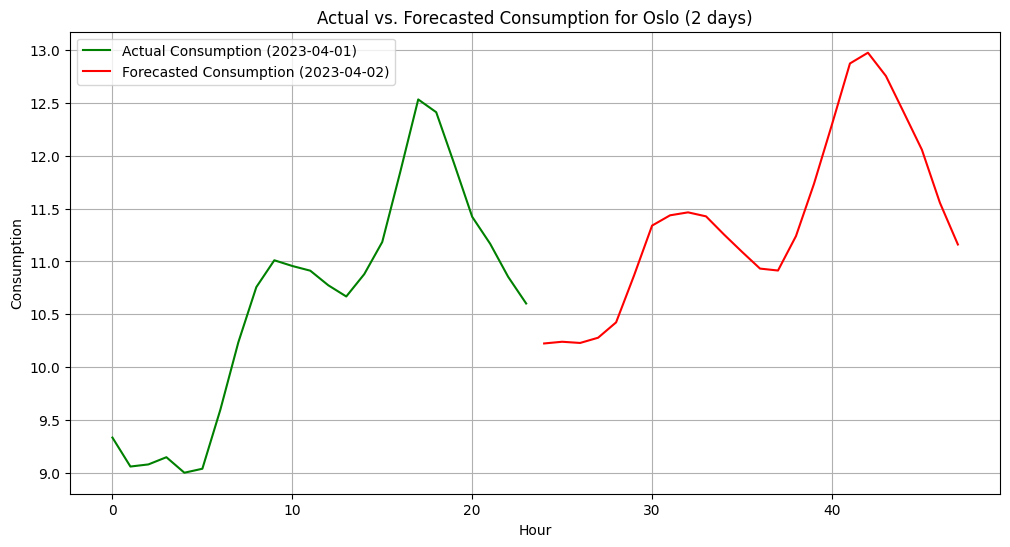

In [47]:
# Plot Actual and Forecasted Consumption
plt.figure(figsize=(12, 6))
plt.plot(actual_consumption_oslo_2['hour'], actual_consumption_oslo_2['consumption'], label='Actual Consumption (2023-04-01)', color='green')
plt.plot(forecasted_data_oslo.index+24, forecasted_data_oslo['forecasted_consumption'], label='Forecasted Consumption (2023-04-02)', color='red')
plt.title('Actual vs. Forecasted Consumption for Oslo (2 days)')
plt.xlabel('Hour')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
#plt.savefig("plots/oslo2.png")
plt.show()

/var/folders/lq/cq047j2d58s58sf6rf4hvnl40000gn/T/ipykernel_37215/383474306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_consumption_oslo_2['normalized_actual'] = actual_consumption_oslo_2['consumption'] / actual_consumption_oslo_2['consumption'].max()


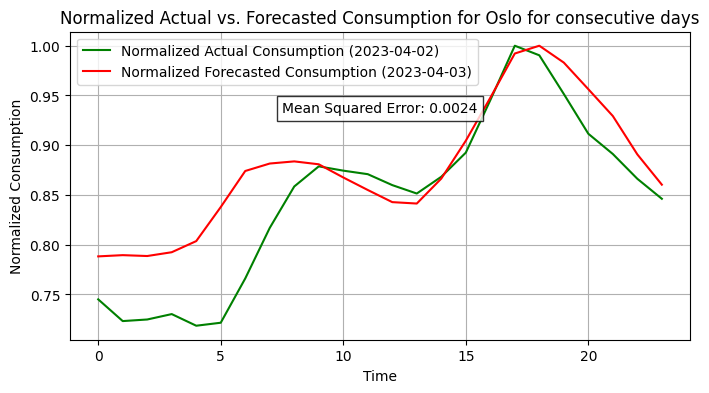

In [48]:
# Normalize the data
actual_consumption_oslo_2['normalized_actual'] = actual_consumption_oslo_2['consumption'] / actual_consumption_oslo_2['consumption'].max()
forecasted_data_oslo['normalized_forecasted'] = forecasted_data_oslo['forecasted_consumption'] / forecasted_data_oslo['forecasted_consumption'].max()

# Calculate the mean squared error between normalized actual and forecasted consumption
mse = mean_squared_error(actual_consumption_oslo_2['normalized_actual'].values, forecasted_data_oslo['normalized_forecasted'].values)

# Plot Normalized Actual and Forecasted Consumption with mean squared error
plt.figure(figsize=(8, 4))
plt.plot(actual_consumption_oslo_2['hour'], actual_consumption_oslo_2['normalized_actual'], label='Normalized Actual Consumption (2023-04-02)', color='green')
plt.plot(forecasted_data_oslo.index, forecasted_data_oslo['normalized_forecasted'], label='Normalized Forecasted Consumption (2023-04-03)', color='red')
plt.title(f'Normalized Actual vs. Forecasted Consumption for Oslo for consecutive days')
plt.xlabel('Time')
plt.ylabel('Normalized Consumption')
plt.legend()

# Add mean squared error as text
plt.text(0.5, 0.75, f'Mean Squared Error: {mse:.4f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True)
#plt.savefig("plots/oslo_normalized.png")
plt.show()